In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

plt.rc('font', family = 'Malgum Gothic')

# 분류 모델

In [2]:
random_state = 2020

n_samples = 1000

# 초승달 모양의 분류 데이터 생성
features, target = make_moons(n_samples = n_samples, noise = 0.2, random_state = random_state) 
# 노이즈를 작게하면 학습이 너무 잘 될것이다. 모양도 이쁘게 나옴

findfont: Font family ['Malgum Gothic'] not found. Falling back to DejaVu Sans.


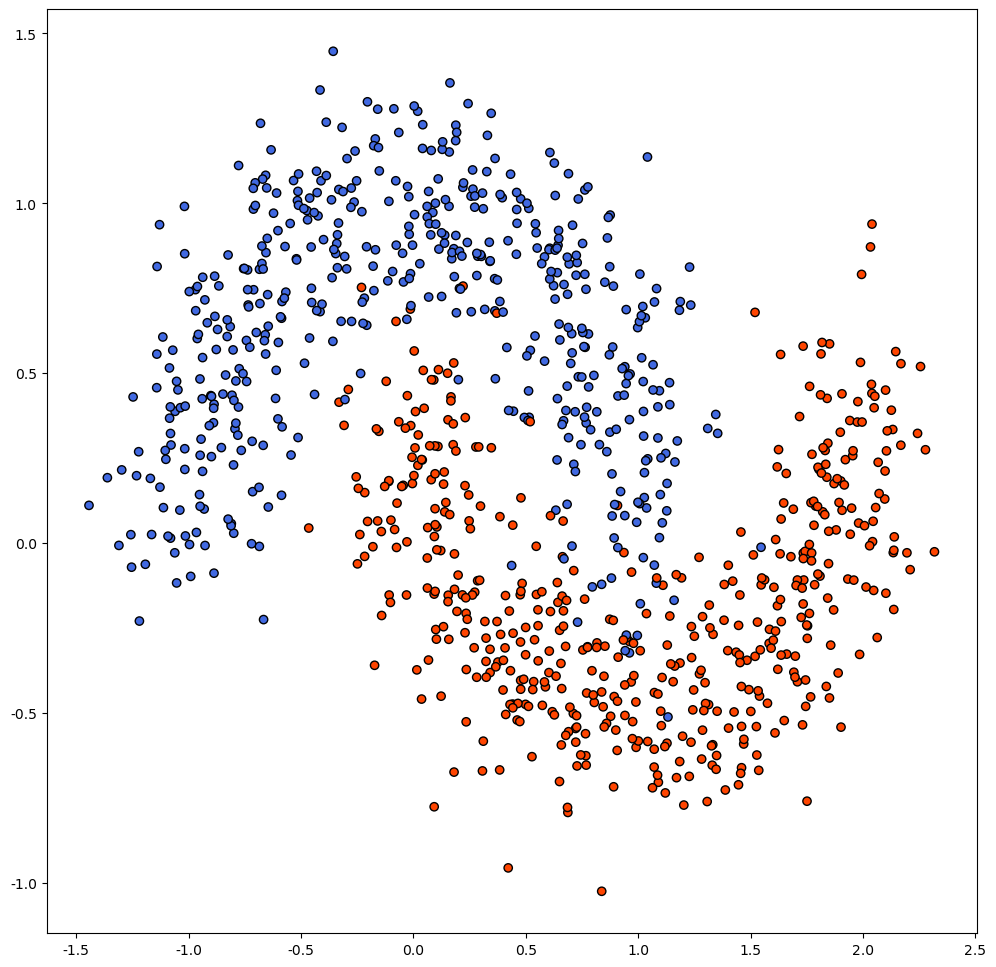

In [3]:
cmap = ListedColormap(['royalblue', 'orangered'])

fig = plt.figure(figsize = (12,12))
plt.scatter(features[:, 0], features[:,1],  c= target, edgecolor= 'k', cmap = cmap)

plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, 
                                                    random_state = random_state)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
model = DecisionTreeClassifier(max_depth = 3) # max_depth 가 깊어질수록 과적합 될 수 있다.
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [7]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

print(round(acc_train, 3))
print(round(acc_test, 3))

0.916
0.945


In [8]:
feature = scaler.transform(features)

x_min, x_max = feature[:, 0].min() - 5, feature[:, 0].max() + 5
y_min, y_max = feature[:, 1].min() - 5, feature[:, 1].max() + 5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02) ,np.arange(y_min, y_max, 0.02))

grid = np.hstack([xx.reshape(-1, 1), yy.reshape(-1, 1)])

In [9]:
y_pred_prob = model.predict_proba(grid)[: ,1]

Z = y_pred_prob.reshape(xx.shape)

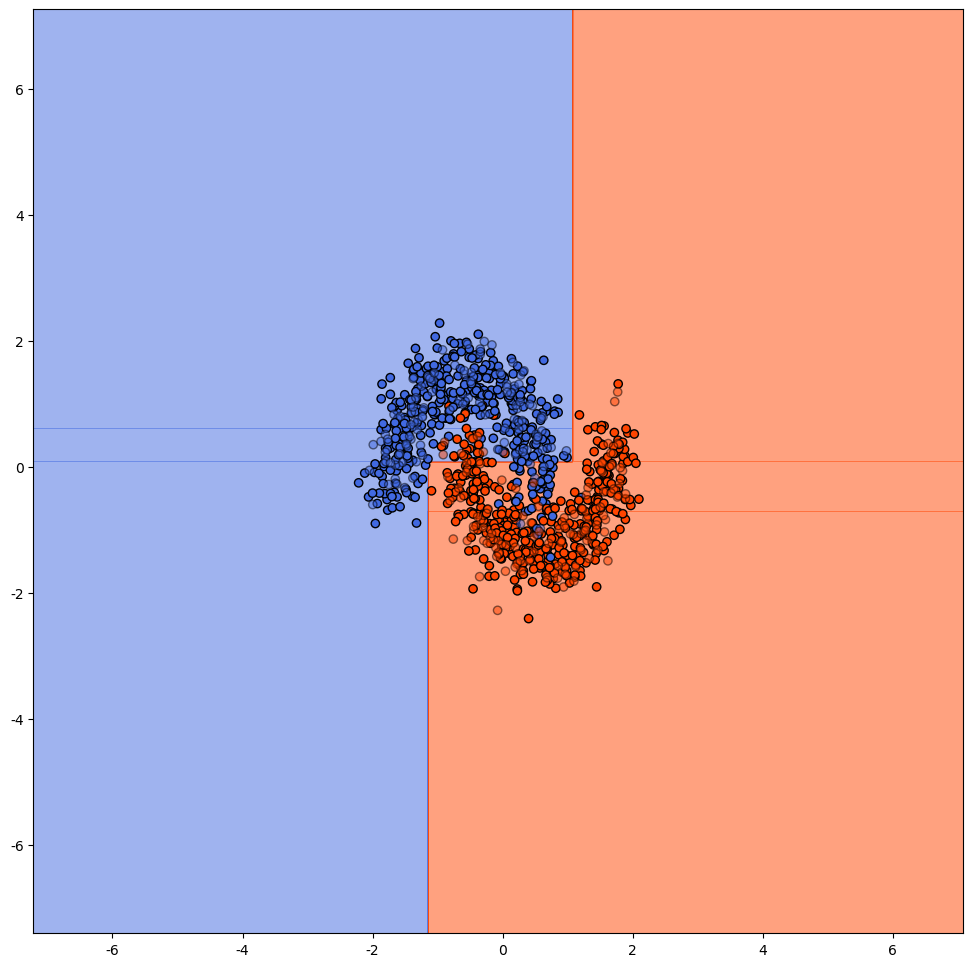

In [10]:
plt.figure(figsize = (12,12))

plt.contourf(xx, yy, Z, alpha = 0.5, cmap = cmap)
plt.scatter(X_train[:, 0], X_train[:,1], c = y_train, edgecolors = 'k', cmap = cmap)
plt.scatter(X_test[:, 0], X_test[:,1], c = y_test, edgecolors = 'k', alpha = 0.5, cmap = cmap)

plt.show()

findfont: Font family ['Malgum Gothic'] not found. Falling back to DejaVu Sans.


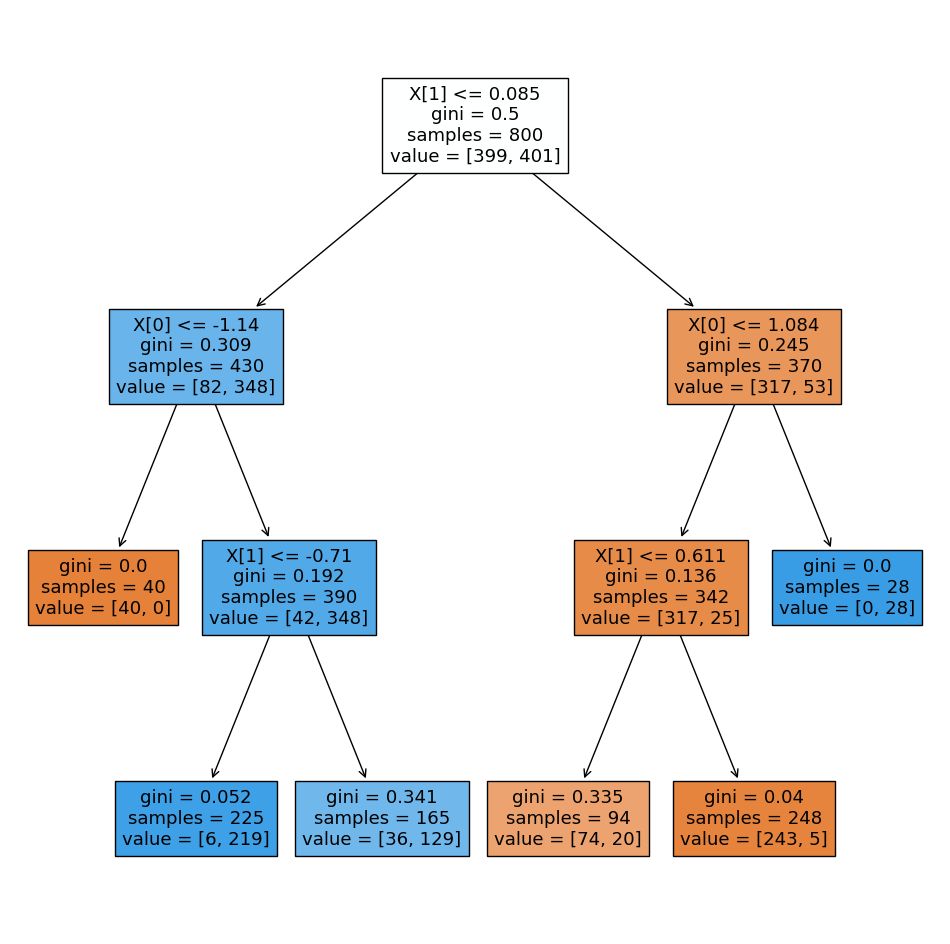

In [11]:
plt.figure(figsize = (12,12))
plot_tree(decision_tree = model , filled = True)
plt.show()

In [12]:
acc_tr = []
acc_te = []


for i in range(3, 11):
    model = DecisionTreeClassifier(max_depth = i) # max_depth 가 깊어질수록 과적합 될 수 있다.
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    acc_train = accuracy_score(y_train, y_train_pred)
    acc_test = accuracy_score(y_test, y_test_pred)

    acc_tr.append(round(acc_train, 3))
    acc_te.append(round(acc_test, 3))

print(acc_tr)
print(acc_te)

[0.916, 0.916, 0.978, 0.981, 0.99, 0.994, 0.999, 1.0]
[0.945, 0.945, 0.955, 0.955, 0.96, 0.96, 0.955, 0.955]


# 회귀 모델

In [13]:
random_state = 2020
n_samples = 1000

np.random.seed(random_state) # random seed 고정 

X = np.random.rand(n_samples, 1) * 10 # np.random.rand (x,y) : 행 x 개 , 열 y 개만큼의 유니폼 분포 (0,1) 난수 생성
X = np.sort(X, axis=0) # 행을 기준으로 크기 순 나열

y = np.sin(X).reshape(-1, ) + np.random.randn(n_samples) * 0.5

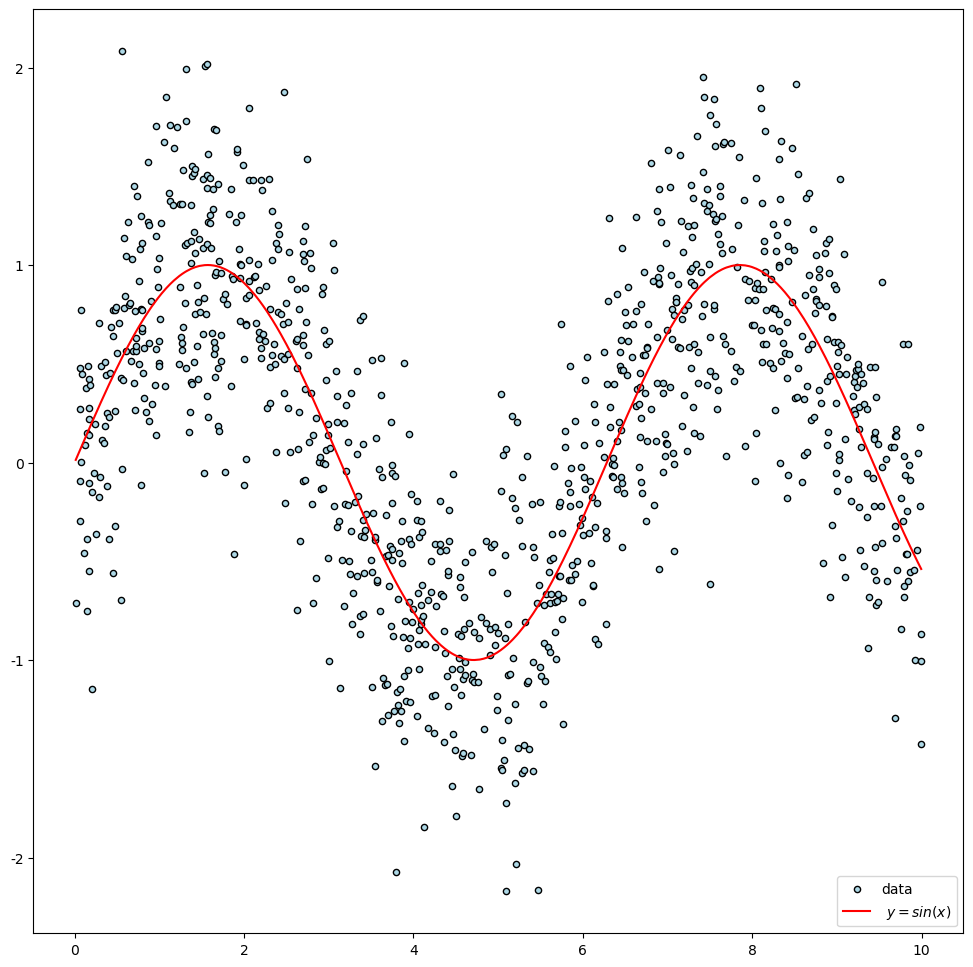

In [14]:
plt.figure(figsize = (12, 12))
plt.scatter(X, y, s= 20, edgecolor = 'black', c= 'lightblue', label = 'data')
plt.plot(X, np.sin(X), c ='red', label = ' $y=sin(x)$')
plt.legend(loc = 'lower right')
plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state)

sort_idx = np.argsort(X_test, axis = 0).reshape(-1)
X_test, y_test = X_test[sort_idx], y_test[sort_idx]

model = DecisionTreeRegressor(max_depth = None)
model.fit(X_train, y_train)

DecisionTreeRegressor()

findfont: Font family ['Malgum Gothic'] not found. Falling back to DejaVu Sans.


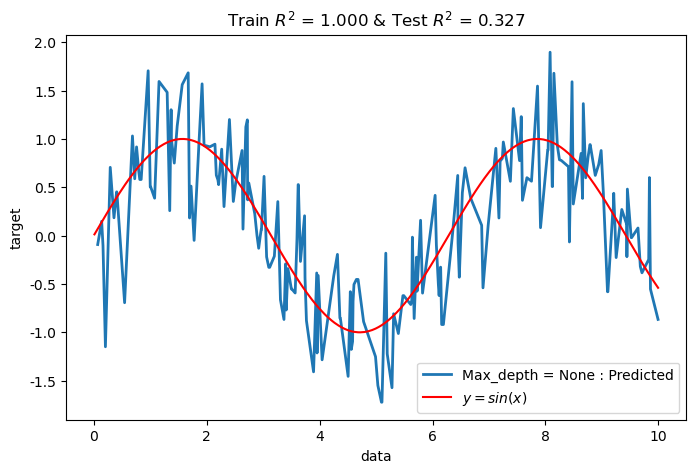

In [16]:
y_test_pred = model.predict(X_test)

# 원본 데이터 및 결과 시각화
plt.figure(figsize=(8, 5))

plt.plot(X_test, y_test_pred, linewidth=2 , label = 'Max_depth = None : Predicted')
plt.plot(X,np.sin(X), c = 'red' , label ='$y=sin(x)$')

plt.xlabel('data')
plt.ylabel('target')
plt.legend(loc='lower right')
train_r2 = r2_score(y_pred=model.predict(X_train) , y_true = y_train) 
test_r2 = r2_score(y_pred= y_test_pred, y_true = y_test)
plt.title('Train $R^2$ = {:.3f} & Test $R^2$ = {:.3f}'.format(train_r2, test_r2))
plt.show()

Font 'default' does not have a glyph for '\uc815' [U+c815], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ub2f5' [U+b2f5], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc120' [U+c120], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc815' [U+c815], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ub2f5' [U+b2f5], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc120' [U+c120], substituting with a dummy symbol.


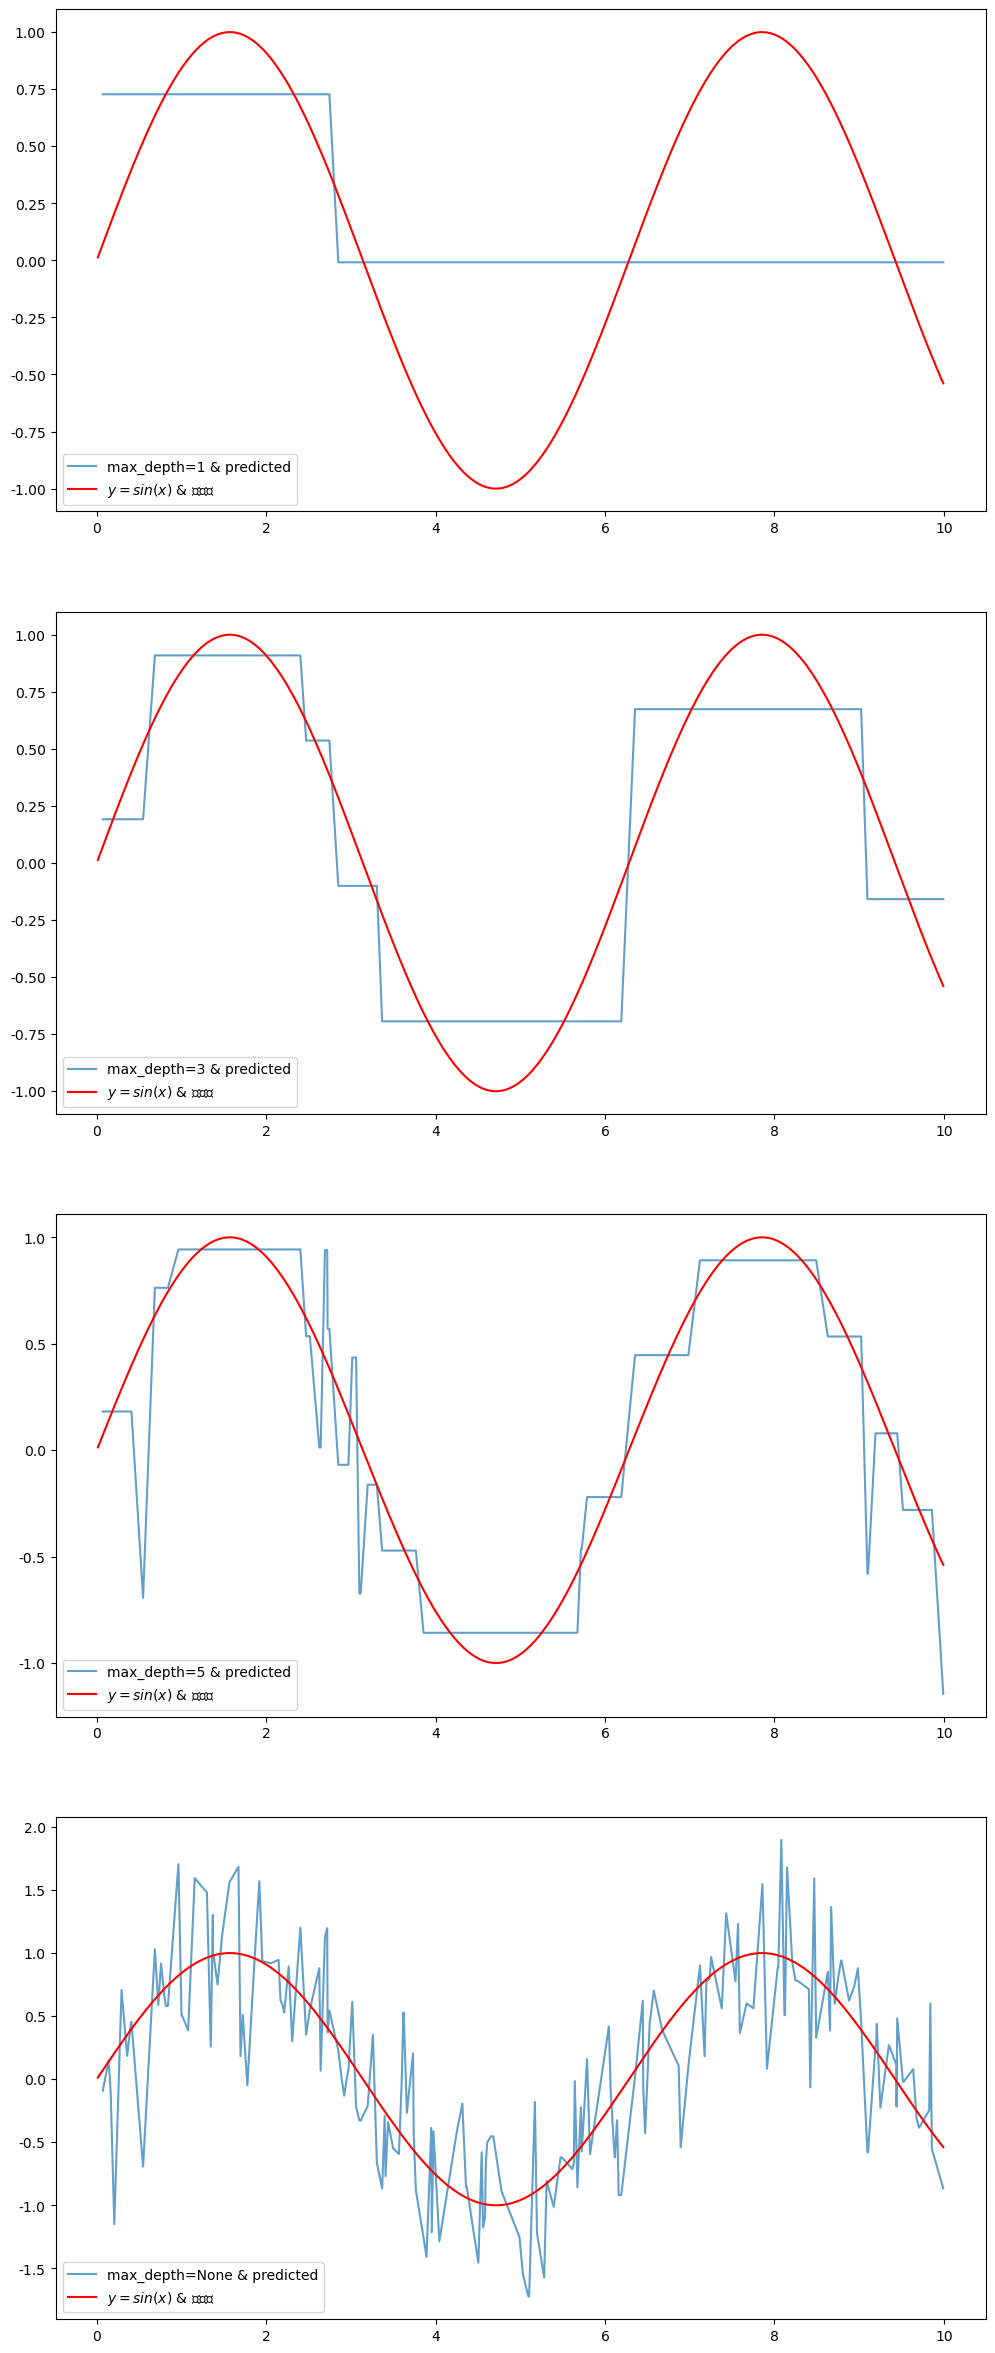

In [17]:
max_depths = [1, 3, 5, None]
train_r2 = []
test_r2 = []

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(12, 30))
axs = axs.ravel()


for i, max_depth in enumerate(max_depths):
    
    # 모델 학습
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(X_train, y_train)
    
    # 예측
    y_test_pred = model.predict(X_test)
    
    # plot
    axs[i].plot(X_test, y_test_pred, label='max_depth={} & predicted'.format(max_depth), linewidth=1.5, alpha=0.7)
    axs[i].plot(X,np.sin(X), c = 'red' , label ='$y=sin(x)$ & 정답선')

    # 예측 score 기록
    train_r2.append(r2_score(y_pred=model.predict(X_train) , y_true = y_train) )
    test_r2.append(r2_score(y_pred= y_test_pred, y_true = y_test))

    axs[i].legend()
plt.show()

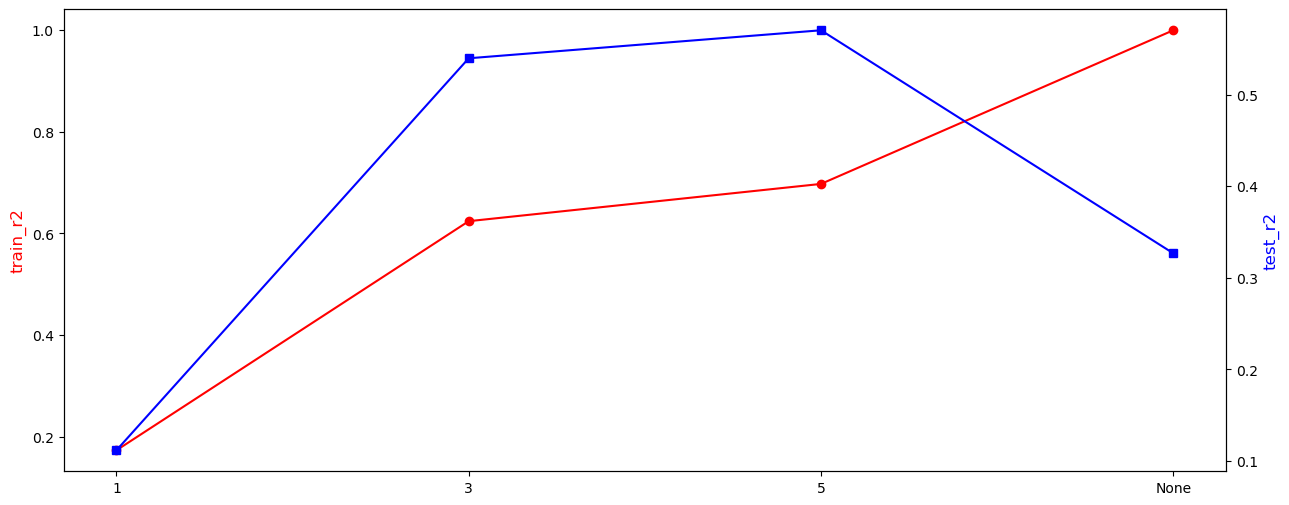

In [18]:
fig, ax = plt.subplots(figsize=(15, 6))

xticks = list(map(str, max_depths))

ax.plot(range(len(max_depths)), train_r2, color='red', marker='o')
ax.set_ylabel('train_r2', color='red', fontsize=12)

ax2 = ax.twinx()
ax2.plot(range(len(max_depths)), test_r2, color='blue', marker='s')
ax2.set_ylabel('test_r2', color='blue', fontsize=12)

plt.xticks(range(len(max_depths)), xticks)
plt.show()